In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from fastai.vision import *

In [0]:
folder = 'black_cars'
file = 'black_cars.txt'

In [0]:
folder = 'toy_cars'
file = 'toy_cars.txt'

In [0]:
folder = 'vintage_cars'
file = 'vintage_cars.txt'

In [0]:
path = Path('gdrive/My Drive/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [14]:
path.ls()

[PosixPath('gdrive/My Drive/cars/toy_cars'),
 PosixPath('gdrive/My Drive/cars/vintage_cars'),
 PosixPath('gdrive/My Drive/cars/black_cars')]

In [0]:
download_images('drive/My Drive/cars/vintage_cars.txt', dest, max_pics=200)

In [0]:
classes = ['black','toy','vintage']

In [0]:
verify_images('gdrive/My Drive/cars/black_cars/', delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [24]:
data.classes

['black_cars', 'toy_cars', 'vintage_cars']

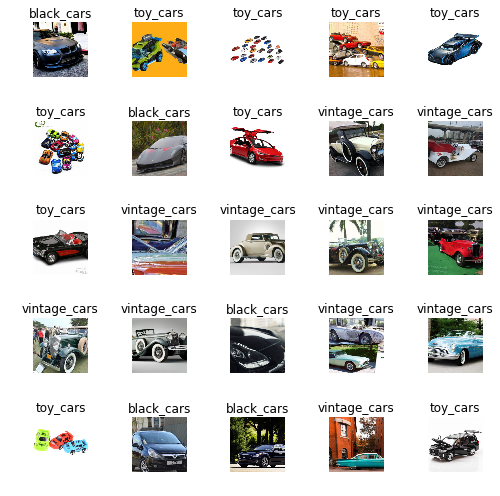

In [25]:
data.show_batch(rows=5,figsize=(7,7))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [27]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.258225,0.684699,0.303571,01:18
1,0.895246,0.500548,0.232143,01:21
2,0.679253,0.418755,0.178571,01:20
3,0.546861,0.341816,0.125000,01:20
4,0.452838,0.301004,0.107143,01:20


In [0]:
model_interpretation = ClassificationInterpretation.from_learner(learn)

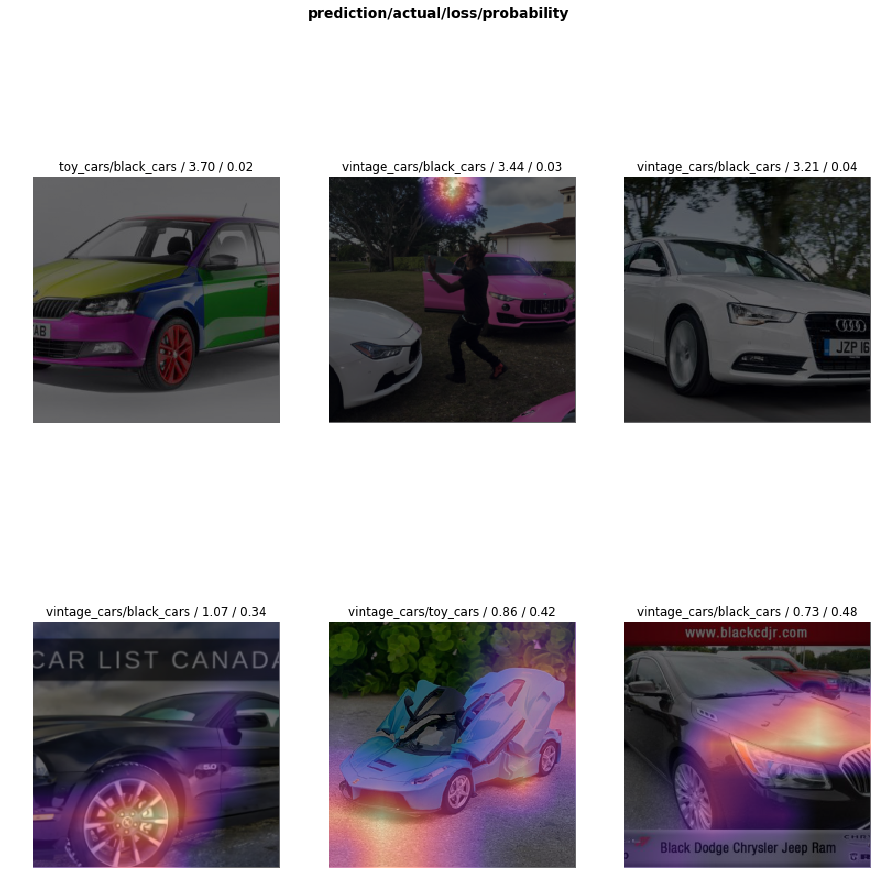

In [29]:
model_interpretation.plot_top_losses(6,figsize=(15,15))

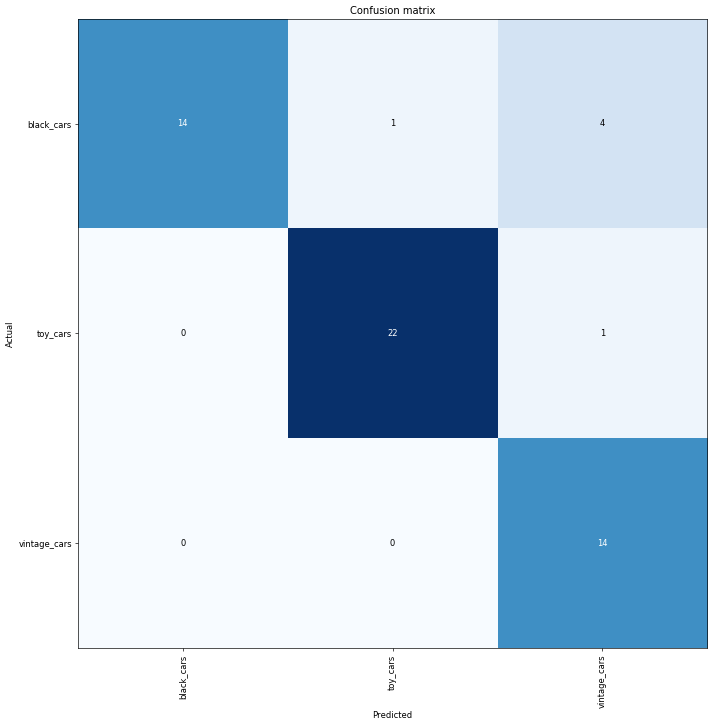

In [30]:
model_interpretation.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [31]:
model_interpretation.most_confused(min_val=2)

[('black_cars', 'vintage_cars', 4)]

## PRODUCTION

In [0]:
from fastai.widgets import *

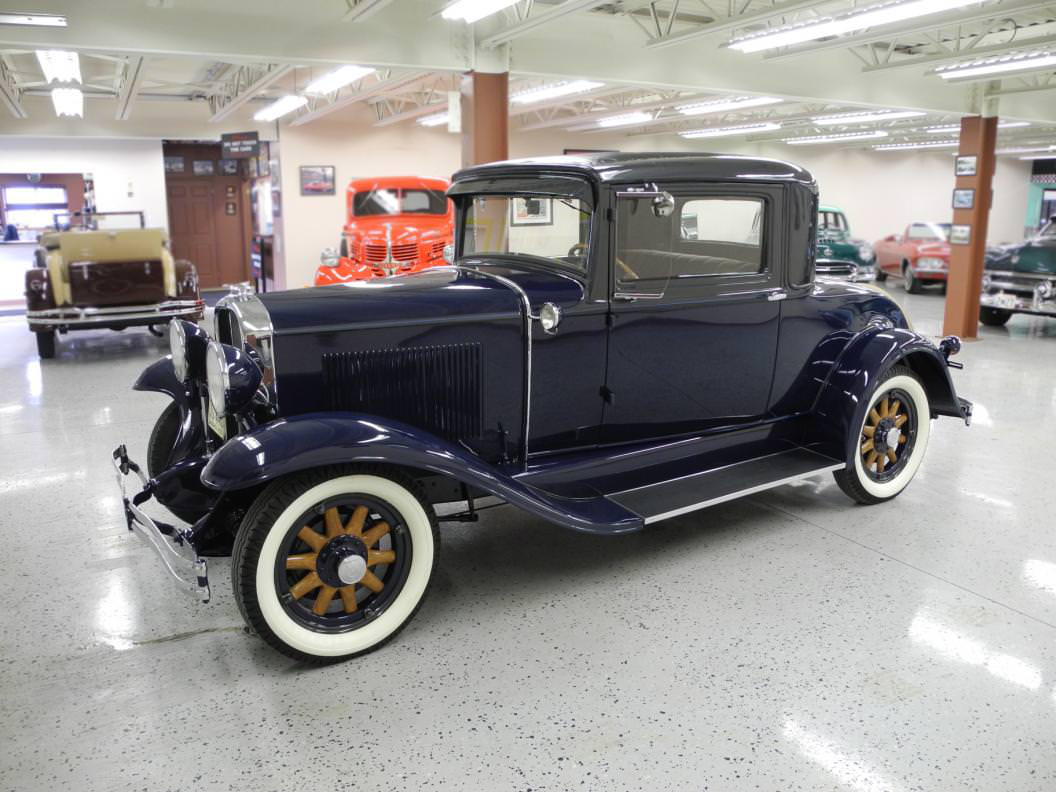

In [42]:
img = open_image('/content/black car image.jpg')
img

In [43]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category vintage_cars

In [0]:
error_rate??

In [45]:
doc(error_rate)